![](data/5.jpg)
![](data/5_1.jpg)
![](data/5_2.jpg)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
test = np.loadtxt('data/quasar_test.csv', delimiter=',') 
train = np.loadtxt('data/quasar_train.csv', delimiter = ',')

#### (a) Locally weighted linear regression
Consider a linear regression problem in which we want to "weight" different training examples differently. Specifically, it is
$$J(\theta) = \frac{1}{2} \sum_{i = 1}^m w^{(i)} (\theta^Tx^{(i)} - y^{(i)})^2$$
##### i. 
Show that $J(\theta)$ could be written as $$J(\theta) = (X\theta - \vec{y})^T W (X\theta - \vec{y})$$ 
For an  appropriate diagonal matrix W. And state clearly what W is

For a diagonal matrix $W \in \mathbb{R}^{m \times m}$
$$(X\theta - \vec{y})^T W (X\theta - \vec{y}) = \sum_{i = 1}^m W_{ii}(\theta^T x^{(i)} - y^{(i)})^2$$
So if we make $W_{ii} = \frac{1}{2}w^{(i)}$, We get the representation.

##### ii.
Generalize the normal equation to this weighted setting, and give the new value of $\theta$ that minimizes $J(\theta)$ in closed form as a function of $X$, $W$ and $\vec{y}$

According to the chain rule
$$\begin{equation}\begin{split}
\nabla_{\theta} J(\theta) & = \nabla_{\theta} (X\theta - \vec{y})^T W (X\theta - \vec{y}) \\
& = X^T 2W(X\theta - \vec{y})
\end{split}\end{equation}$$
$\nabla_{\theta} J = 0$ means that
$$\begin{align*}
X^T W (X\theta - \vec{y}) & = 0 \\
X^T W X\theta & = X^T W \vec{y} \\
\theta & = (X^T W X)^{-1} X^T W \vec{y}
\end{align*}$$

##### iii.
Suppose we have a training set $\{(x^{(i)}, y^{(i)}); i = 1,..., m\}$ of $m$ independent examples, but $y^{(i)}$'s were observed with differing variances. Specifically
$$p(y^{(i)}| x^{(i)}; \theta) = \frac{1}{\sqrt{2 \pi} \sigma^{(i)}} exp \Big( -\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \Big)$$
Show that finding the maximum likelihood estimate of $\theta$ reduces to solving a weighted linear regression problem. State clearly what the $w^{(i)}$'s are in terms of the $\sigma^{(i)}$'s

Given the training set described above, the log-likelihood will be

$$\begin{equation}\begin{split}
l(\theta) & = log \prod \frac{1}{\sqrt{2 \pi} \sigma^{(i)}} exp \Big( -\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \Big) \\
& = - \sum log(\sqrt{2 \pi} \sigma^{(i)}) + \sum{ -\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}}
\end{split}\end{equation}$$
Then maximize log-likelihood equal to minimize $\sum{\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2}}$
Make $w^{(i)} = (\sigma^{(i)})^2$, then it is identical to the linear regression problem

#### (b) Visualing the data
##### i. 
Use the normal equations to implement unweighted linear regression on the first training example. Plot both raw data and the straight line resulting from your fit.

In [17]:
x = train[0, :].T
y = train[1, :].T

In [18]:
x = np.c_[x, np.ones_like(x)]

In [20]:
theta = np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

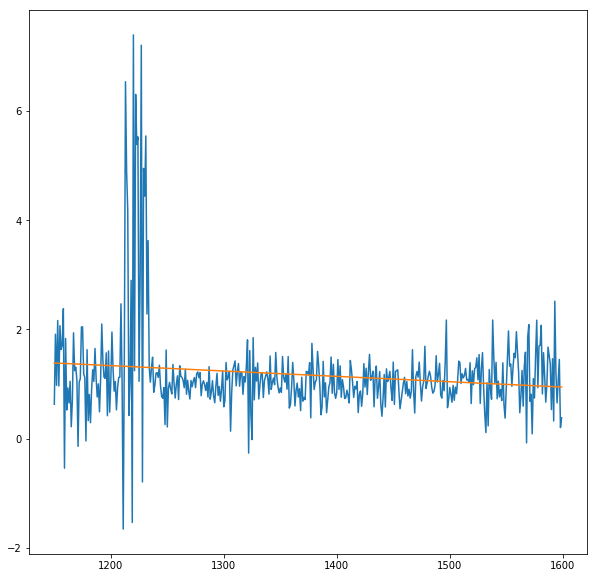

In [32]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x[:, 0], y)
plt.plot(x[:, 0], x.dot(theta.T))

##### ii.
Let the weight function be
$$w^{(i)} = exp \Big( - \frac{(x - x^{(i)})^2}{2\tau^2} \Big)$$, where $\tau = 5$. Implement locally weighted linear regression on the first training example

In [33]:
def ConstructW(xi, x, tau):
    W = np.exp(-(x - xi) ** 2 / 2 / tau ** 2)
    return np.diag(W)

In [69]:
def getYpred(x, tau, y):
    y_pred = np.empty_like(y)
    for i in range(x.shape[0]):
        W = ConstructW(x[i, 0], x[:, 0], tau)
        theta = np.linalg.pinv(x.T.dot(W).dot(x)).dot(x.T).dot(W).dot(y)
        y_pred[i] = x[i, :].reshape((1, 1, 2)).dot(theta)
    return y_pred

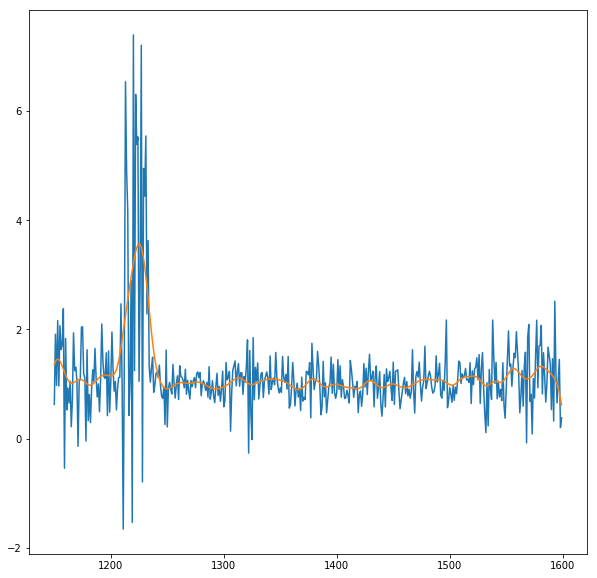

In [70]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x[:, 0], y)
plt.plot(x[:, 0], getYpred(x, 5, y))

##### iii. Repeat four more times with $\tau = 1, 10, 100 \text{ and } 1000$

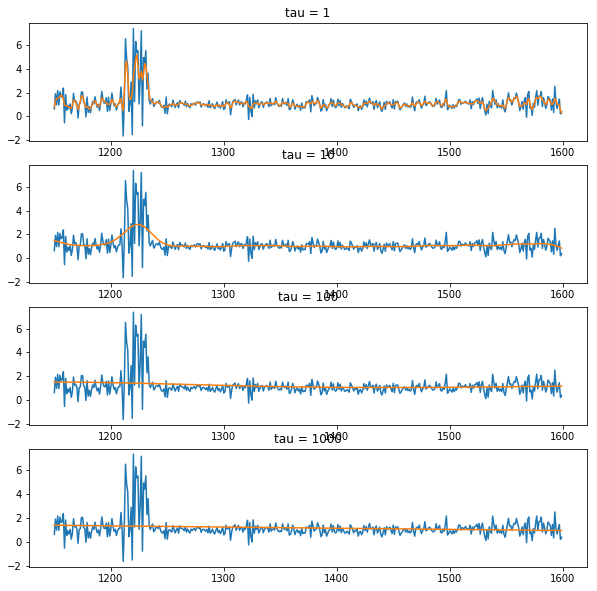

In [67]:
fig, axes = plt.subplots(4, 1, figsize = (10, 10))
for i, tau in enumerate([1, 10, 100, 1000]):
    axes[i].plot(x[:, 0], y)
    axes[i].plot(x[:, 0], getYpred(x, tau, y))
    axes[i].set_title('tau = {0}'.format(tau))

#### (c) Predict quasar spectra with functional regression
![](data/c1.jpg)
![](data/c2.jpg)

##### i. Smooth the training set and test set using $\tau = 5$

In [49]:
train_x = x
train_y = train[1:, :].T

In [77]:
test_x = x
test_y = test[1:, :].T

In [71]:
smoothed_y = getYpred(x, 5, train_y)

In [78]:
smoothed_test_y = getYpred(x, 5, test_y)

In [192]:
get_distance = lambda y1, y2: np.sum((y1[150:].reshape((-1, 1)) - y2[150:, :])** 2, axis = 0)

In [261]:
get_error = lambda y1, y2: np.sum((y1 - y2[:50]) ** 2)

In [82]:
get_weight = lambda t: np.max(1 - t, 0)

In [260]:
def find_nearest_index(k, index = -1, y1 = None):
    if index >= 0:
        y1 = smoothed_y[:, index]
    distances = get_distance(y1, smoothed_y)
    indice = np.argsort(distances)
    if index >= 0:
        return indice[1: k + 1], distances[indice[1:k+ 1]], np.max(distances)
    return indice[:k], distances[indice[:k]], np.max(distances)

In [238]:
def get_f_left(indice, d, h):
    f_left = np.zeros((50, ))
    weight = 0
    for i in range(len(indice)):
        w = get_weight(d[i] / h)
        weight += w
        f_left += w * smoothed_y[: 50, indice[i]]
    f_left /= weight
    return f_left

In [262]:
k = 3
error = 0
for i in range(smoothed_y.shape[1]):
    indice, d, h = find_nearest_index(k, i)
    f_left = get_f_left(indice, d, h)
    error += get_error(f_left, smoothed_y[:50, i])

In [264]:
error / smoothed_y.shape[1]

2.6219203754368836

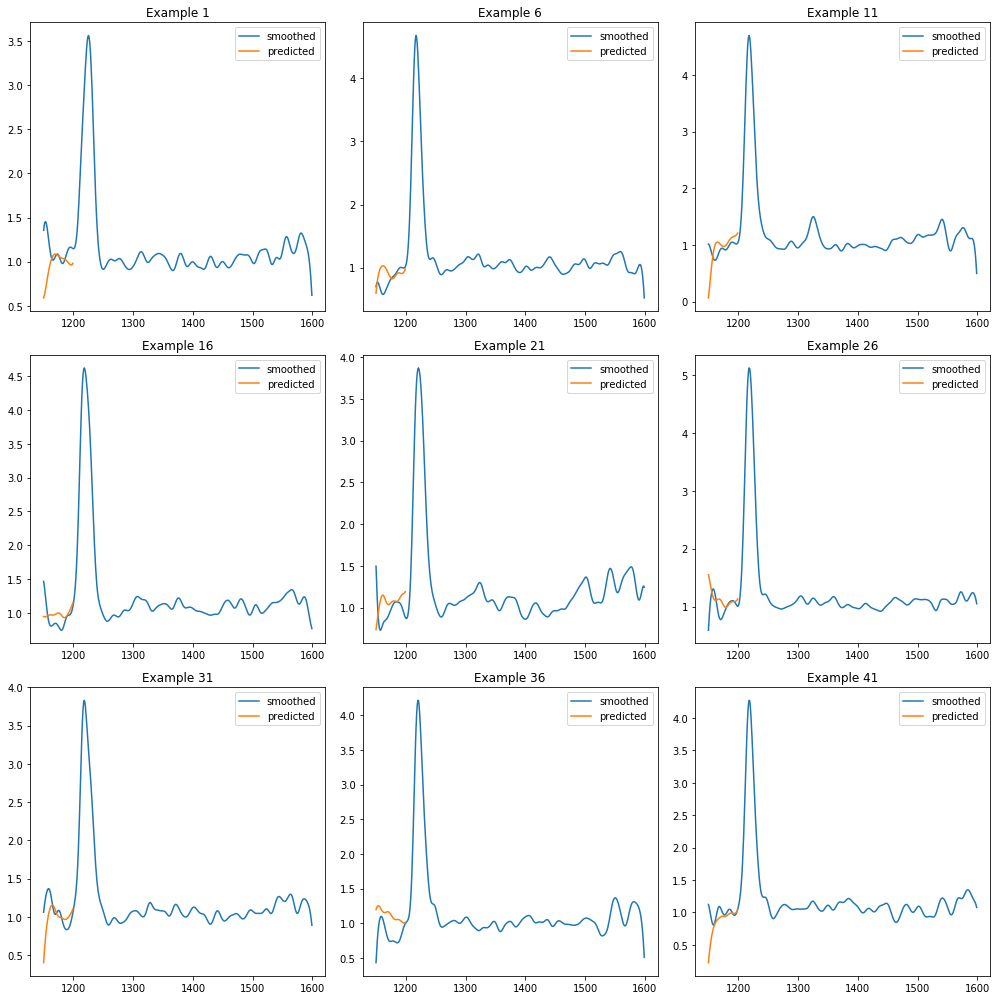

In [247]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
axes = axes.ravel()

for i, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    indice, d, h = find_nearest_index(k, idx)
    f_left = get_f_left(indice, d, h)
    ax = axes[i]
    ax.plot(x[:, 0], smoothed_y[:, idx], label='smoothed')
    ax.plot(x[:50, 0], f_left, label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()

##### iii.

In [267]:
k = 3
error = 0
for i in range(smoothed_test_y.shape[1]):
    indice, d, h = find_nearest_index(k, y1 = smoothed_test_y[:, i])
    f_left = get_f_left(indice, d, h)
    error += get_error(f_left, smoothed_test_y[:50, i])

In [268]:
error / smoothed_test_y.shape[1]

2.7099695794160095

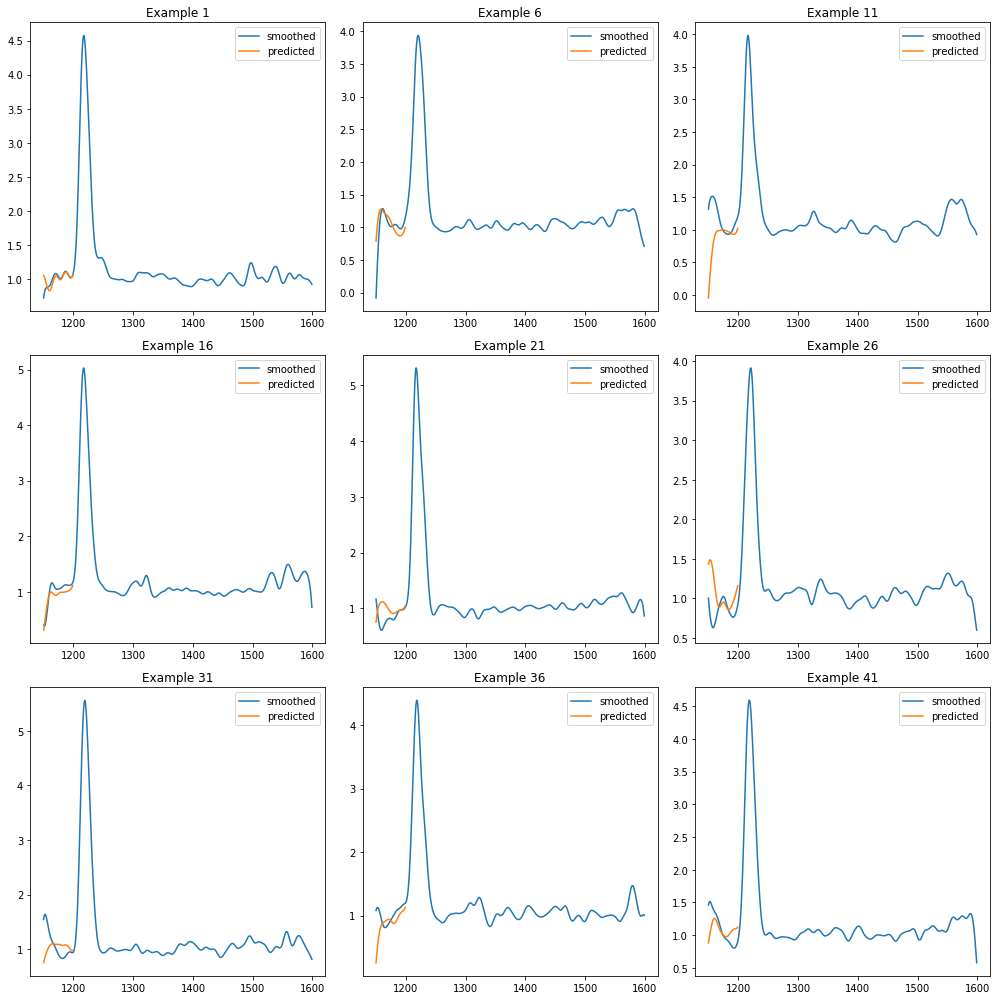

In [248]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
axes = axes.ravel()

for i, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    indice, d, h = find_nearest_index(k, y1 = smoothed_test_y[:, idx])
    f_left = get_f_left(indice, d, h)
    ax = axes[i]
    ax.plot(x[:, 0], smoothed_test_y[:, idx], label='smoothed')
    ax.plot(x[:50, 0], f_left, label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()